In [4]:
#Imports and Auxiliary functions

import numpy as np
import matplotlib.pyplot as plt

%matplotlib nbagg

def transit_total(P, R_star, R_planet, a, i):
    value = (P / np.pi) * np.sqrt( np.divide( np.power( (R_star + R_planet) , 2 ) - np.power( a, 2 ) * np.power( np.cos(i) , 2), np.power( ( a * np.sin(i) ), 2 ) ) )
    return value

def toAU(x):
    return np.divide(x, 1.496e11)

def period(a, M_star): # a in AU, M_star in kg
    G = 6.67e-11
    return np.sqrt(4 * np.pi**2 * np.power(a, 3) / (G * M_star)) * np.power(1.495e11, 1.5)

def toDays(T):
    return(T / 86400)

In [5]:
#For Earth-sized planet around Sun-type star

R_sun = toAU(6.9551e8) # radius of the Sun, in AU
M_sun = 1.989e30 # mass of the Sun, in kg
R_earth = toAU(6.371e6) # radius of the planet, in AU
a = np.arange(0.01, 1.5, 0.05)# radius of the orbit, in AU
P = toDays(period(a, M_sun))
min_angles = np.arccos( np.divide(R_sun+R_earth, a) )
i = np.zeros((10, np.size(a)))
counter = 0
for ang in min_angles:
    i[:, counter] = np.linspace(np.radians(90), ang, num=10, endpoint=False)
    counter += 1
    
t_T = np.zeros_like(i)

for j in range(np.size(a)):
    t_T[:, j] = transit_total(P[j], R_sun, R_earth, a[j], i[:,j])

<IPython.core.display.Javascript object>


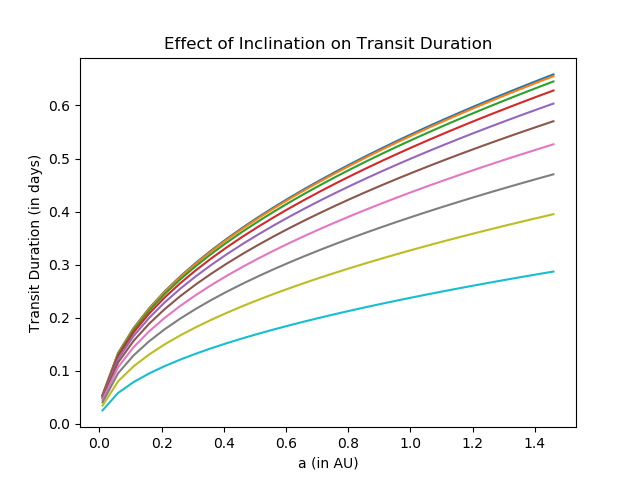

In [6]:
fig = plt.figure()
for j in range(np.shape(t_T)[0]):
    plt.plot(a, t_T[j, :], label='i = ')
plt.xlabel('a (in AU)')
plt.ylabel('Transit Duration (in days)')
plt.title('Effect of Inclination on Transit Duration')
plt.savefig('earthsized.png')

In [7]:
#For Jupiter-sized planet around Sun-type star

R_sun = toAU(6.9551e8) # radius of the Sun, in AU
M_sun = 1.989e30 # mass of the Sun, in kg
R_jupiter = toAU(6.9911e7) # radius of the planet, in AU
a = np.arange(1.0, 8.0, 0.1)# radius of the orbit, in AU
P = toDays(period(a, M_sun))
min_angles = np.arccos( np.divide(R_sun+R_jupiter, a) )
i = np.zeros((10, np.size(a)))
counter = 0
for ang in min_angles:
    i[:, counter] = np.linspace(np.radians(90), ang, num=10, endpoint=False)
    counter += 1
    
t_T = np.zeros_like(i)

for j in range(np.size(a)):
    t_T[:, j] = transit_total(P[j], R_sun, R_earth, a[j], i[:,j])

<IPython.core.display.Javascript object>


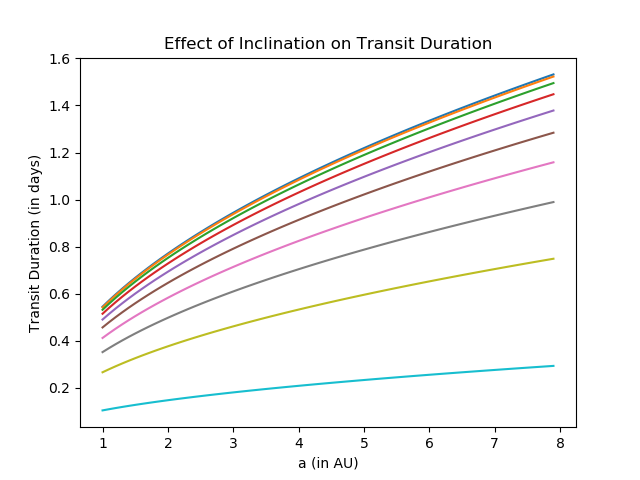

In [8]:
fig = plt.figure()
for j in range(np.shape(t_T)[0]):
    plt.plot(a, t_T[j, :], label='i = ')
plt.xlabel('a (in AU)')
plt.ylabel('Transit Duration (in days)')
plt.title('Effect of Inclination on Transit Duration')
plt.savefig('jupitersized.png')